
# Desafio de Machine Learning Avançado: Previsão de Abandono de Funcionários

O arquivo "HR_Abandono.csv" abriga um conjunto de dados preciosos sobre os colaboradores de uma empresa. Desde o nível de satisfação até o histórico de acidentes de trabalho, cada detalhe é registrado. Este projeto tem um objetivo claro: antecipar, com base nessas informações, se um funcionário está propenso a deixar a empresa. Junte-se a esta jornada de análise e previsão de dados! 📊






In [ ]:
import pandas as pd

Importando a base de dados

In [ ]:
dados = pd.read_csv('https://drive.google.com/uc?id=1a6qtiNRwrIwSiCksnBB8RedWDOHiATZF', sep = ";")

Checando as colunas e as 5 primeiras linhas da base de dados

In [ ]:
dados.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,1,0,low,2,sales
1,2,"0,8","0,86",262,6,0,1,0,medium,5,sales
2,3,"0,11","0,88",272,4,0,1,0,medium,6,sales
3,4,"0,72","0,87",223,5,0,1,0,low,5,sales
4,5,"0,37","0,52",159,3,0,1,0,low,2,sales


Tamanho da base de dados

In [ ]:
dados.shape

(14999, 11)

Média, desvio padrão, minínimo, etc...

In [ ]:
dados.describe()

,id,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,num_project
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,201.083672,3.407027,0.144610,0.238083,0.021268,3.785986
std,4329.982679,50.182121,1.176120,0.351719,0.425924,0.144281,1.194539
min,1.000000,96.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,3750.500000,156.000000,3.000000,0.000000,0.000000,0.000000,3.000000
50%,7500.000000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000
75%,11249.500000,245.000000,4.000000,0.000000,0.000000,0.000000,5.000000
max,14999.000000,810.000000,6.000000,1.000000,1.000000,1.000000,6.000000


Checando se há dados nulos

In [ ]:
dados.isnull().sum()

id                       0
satisfaction_level       0
last_evaluation          0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
num_project              0
depto                    0
dtype: int64

Checando se há dados duplicados

In [ ]:
dados.duplicated().any()

False

Apagando coluna "id" pois não será necessária

In [ ]:
dados = dados.drop(columns=['id'])

Checando quais dados possuem nas colunas depto e salary

In [ ]:
set(dados['depto'])

{'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'}

In [ ]:
set(dados['salary'])

{'high', 'low', 'medium'}

Aplica o LabelEncoder para transformar a categoria "salary" e "depto"" em números

In [ ]:
from sklearn.preprocessing import LabelEncoder

colunas = ['salary', 'depto']

label_encoder = LabelEncoder()
for col in colunas:
    dados[col] = dados[col].astype(str)  # Converta todas as entradas para strings
    dados[col] = label_encoder.fit_transform(dados[col])

dados.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,"0,38","0,53",157,3,0,1,0,1,2,7
1,"0,8","0,86",262,6,0,1,0,2,5,7
2,"0,11","0,88",272,4,0,1,0,2,6,7
3,"0,72","0,87",223,5,0,1,0,1,5,7
4,"0,37","0,52",159,3,0,1,0,1,2,7


Gráfico para analisar cursa semânctica dos dados

array([[<Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'num_project'}>,
        <Axes: title={'center': 'depto'}>, <Axes: >]], dtype=object)

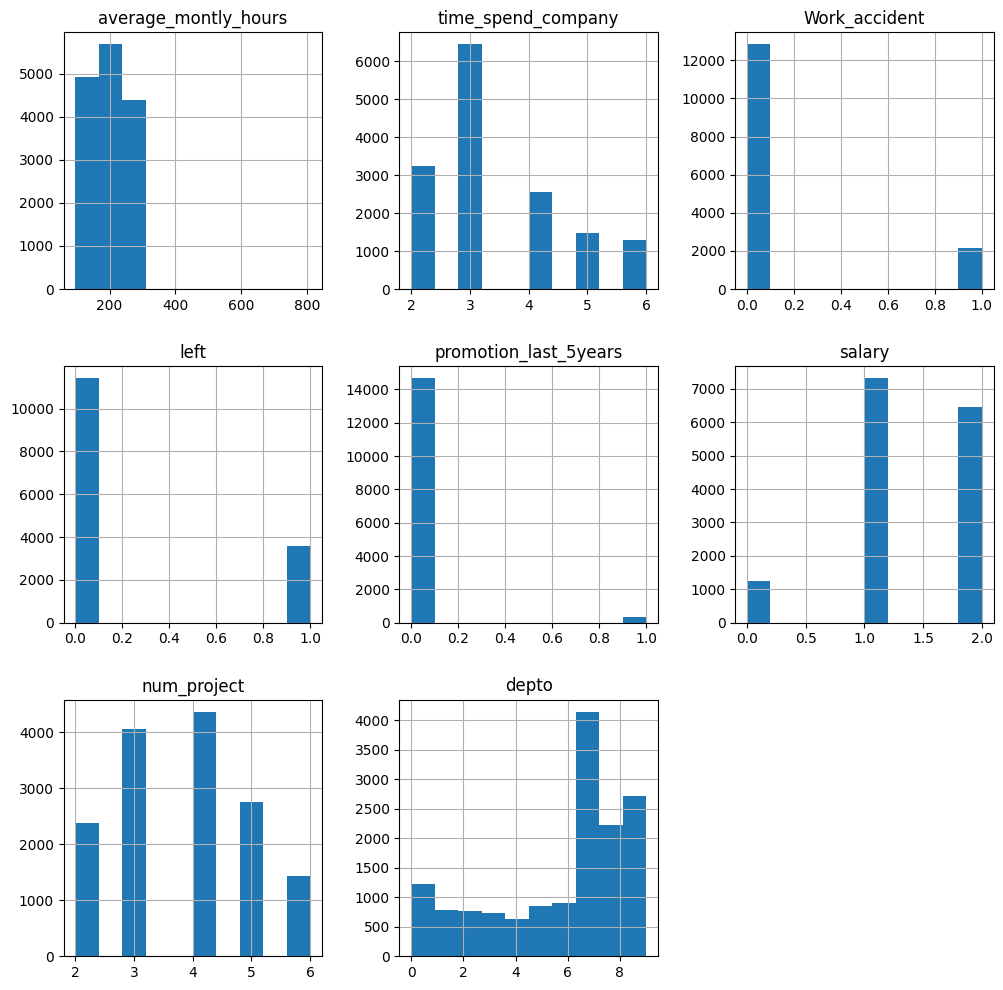

In [ ]:
dados.hist(figsize=(12,12))

Checando os tipos de dados

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   satisfaction_level     14999 non-null  object
 1   last_evaluation        14999 non-null  object
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   salary                 14999 non-null  int64 
 8   num_project            14999 non-null  int64 
 9   depto                  14999 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.1+ MB


Validando porcentagem de funcionários que sairam que e ficaram

In [ ]:
total = len(dados)
totalSairam = dados[dados["left"] == 1].left.count()
totalFicaram = dados[dados["left"] == 0].left.count()

percentual = totalSairam / total

print("Total de dados: ", total)
print("Total que sairam: ", totalSairam)
print("Total que ficaram: ", totalFicaram)
print("Percentual: ", (round(percentual, 2)*100), "%")

Total de dados:  14999
Total que sairam:  3571
Total que ficaram:  11428
Percentual:  24.0 %


Exempleficação em gráfico da porcentagem dos que ficaram e dos que sairam

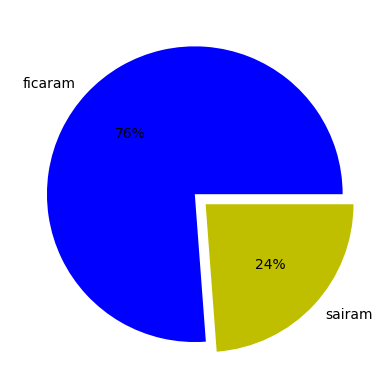

In [ ]:
import matplotlib.pyplot as plt

categororias = ["ficaram", "sairam"]
plt.pie(dados["left"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("b", "y"))
plt.show()

Separando os dados dos que sairam

In [ ]:
dados_sairam = dados[dados["left"] == 1]
dados_sairam.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,"0,38","0,53",157,3,0,1,0,1,2,7
1,"0,8","0,86",262,6,0,1,0,2,5,7
2,"0,11","0,88",272,4,0,1,0,2,6,7
3,"0,72","0,87",223,5,0,1,0,1,5,7
4,"0,37","0,52",159,3,0,1,0,1,2,7


Algumas perguntas para analisar os dados

<ipython-input-21-b187ac4a103c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Work_accident", palette = "Paired", data = dados_sairam) # tiveram algum acidente na empresa?
<ipython-input-21-b187ac4a103c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "promotion_last_5years", palette = "Paired", data = dados_sairam) # tiveram alguma promoção nos últimos 5 anos?
<ipython-input-21-b187ac4a103c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "salary", palette = "Paired", data = dados_sairam) # tinham salário baixo?
<ip

<Axes: xlabel='num_project', ylabel='count'>

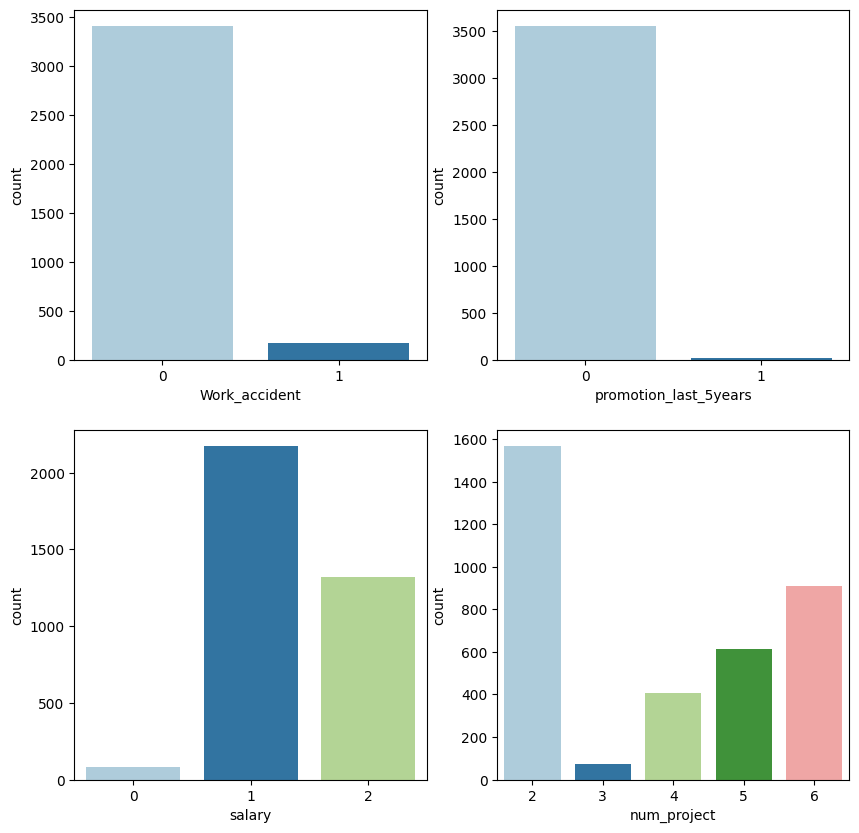

In [ ]:
import seaborn as sns

plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x = "Work_accident", palette = "Paired", data = dados_sairam) # tiveram algum acidente na empresa?

plt.subplot(2,2,2)
sns.countplot(x = "promotion_last_5years", palette = "Paired", data = dados_sairam) # tiveram alguma promoção nos últimos 5 anos?

plt.subplot(2,2,3)
sns.countplot(x = "salary", palette = "Paired", data = dados_sairam) # tinham salário baixo?

plt.subplot(2,2,4)
sns.countplot(x = "num_project", palette = "Paired", data = dados_sairam) # tinham muitos projetos?

In [ ]:
dados_sairam.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,"0,38","0,53",157,3,0,1,0,1,2,7
1,"0,8","0,86",262,6,0,1,0,2,5,7
2,"0,11","0,88",272,4,0,1,0,2,6,7
3,"0,72","0,87",223,5,0,1,0,1,5,7
4,"0,37","0,52",159,3,0,1,0,1,2,7


Tranformando os dados string em float para representação gráfica

In [ ]:
import numpy as np

dados['satisfaction_level'] = dados['satisfaction_level'].str.replace(',', '.').astype(float)
dados['last_evaluation'] = dados['last_evaluation'].str.replace(',', '.').astype(float)

numeric_columns = ["satisfaction_level", "last_evaluation"]

for column in numeric_columns:
    dados[column] = np.log10(dados[column])

In [ ]:
Gráfico de correlação

<Axes: >

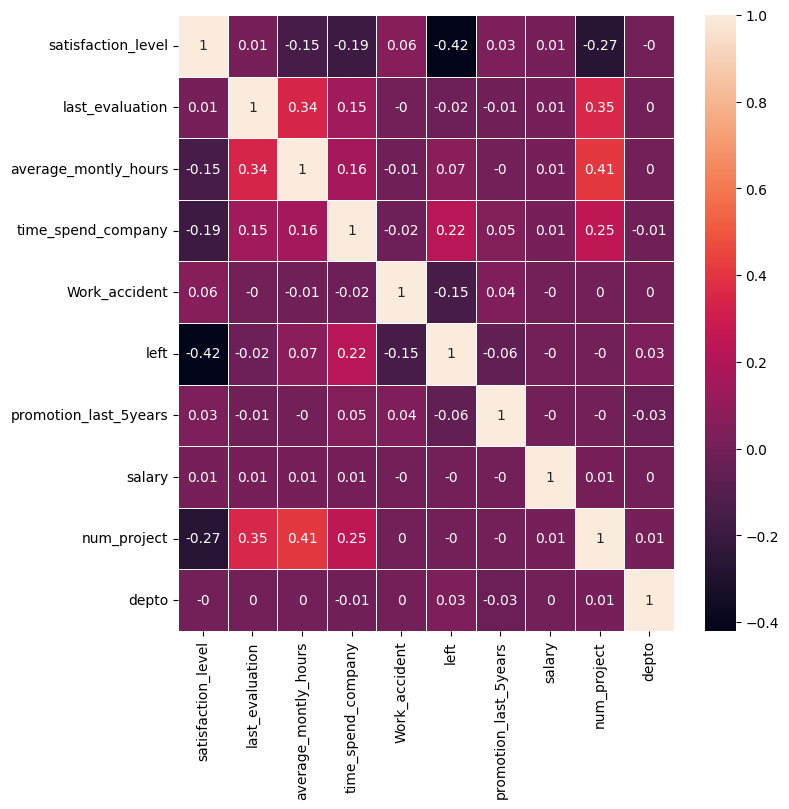

In [ ]:
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Gráfico de análise de normalidade

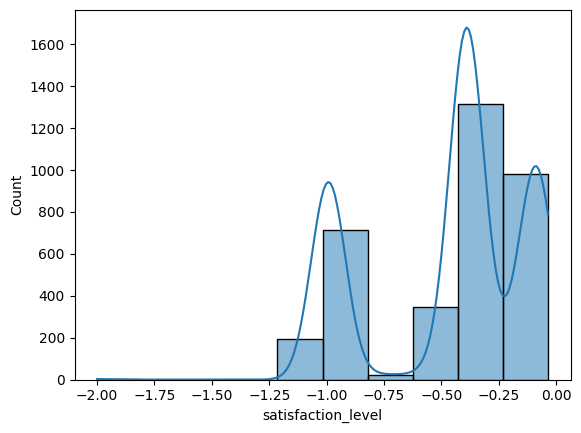

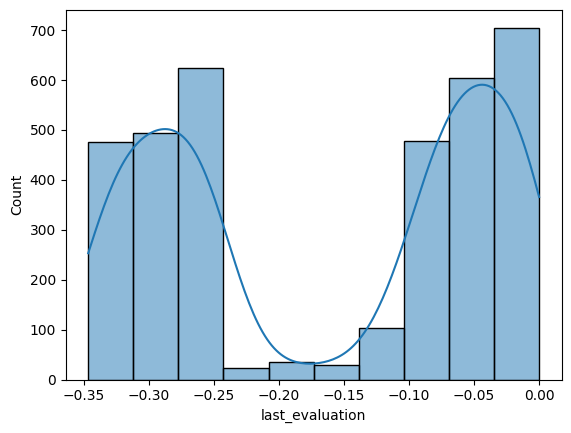

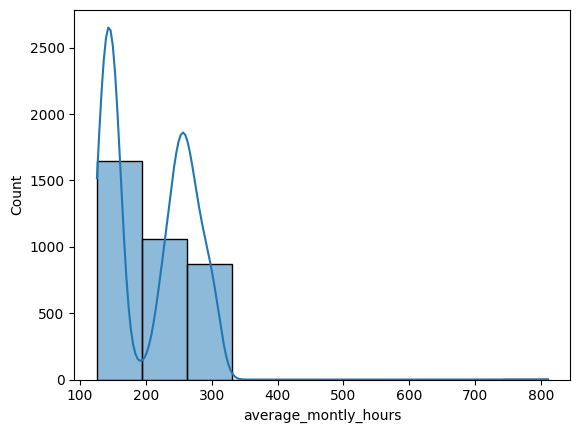

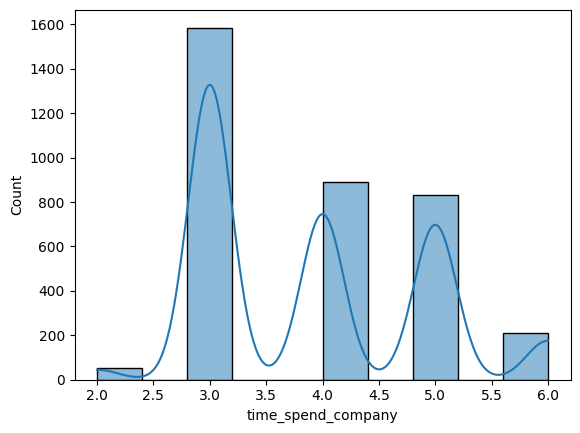

In [ ]:
colunasNumericasNormais = ["satisfaction_level", "last_evaluation", "average_montly_hours", "time_spend_company"]
for column in colunasNumericasNormais:
    plt.figure()
    plot = dados_sairam[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

In [ ]:
round(dados_sairam.satisfaction_level.mean(),2)

-0.46

In [ ]:
round(dados_sairam.last_evaluation.mean(),2)

-0.16

In [ ]:
valores_unicos_satisfaction_level = dados['satisfaction_level'].unique()
valores_unicos_satisfaction_level

array([-0.4202164 , -0.09691001, -0.95860731, -0.1426675 , -0.43179828,
       -0.38721614, -1.        , -0.03621217, -0.05060999, -0.37675071,
       -0.34678749, -0.07572071, -0.4436975 , -0.1079054 , -0.11918641,
       -2.        , -0.33724217, -0.39794001, -0.08618615, -1.04575749,
       -0.06048075, -0.24412514, -0.36653154, -0.88605665, -0.35654732,
       -0.40893539, -0.07058107, -0.09151498, -0.04575749, -0.13076828,
       -0.10237291, -0.76955108, -0.61978876, -0.04095861, -0.14874165,
       -0.06550155, -0.85387196, -0.12493874, -0.15490196, -0.50863831,
       -0.13667714, -0.08092191, -0.49485002, -0.26760624, -0.56863624,
       -0.11350927, -0.05551733, -0.31875876, -0.7212464 , -0.22184875,
       -0.92081875, -0.21467016, -0.48148606, -0.25181197, -0.32790214,
       -0.55284197, -0.25963731, -0.27572413, -0.22914799, -0.18045606,
       -0.60205999, -0.46852108, -0.23657201, -0.29242982, -0.45593196,
       -0.19382003, -0.30103   , -0.63827216, -0.82390874, -0.30

In [ ]:
valores_unicos_last_evaluation = dados['last_evaluation'].unique()
valores_unicos_last_evaluation

array([-0.27572413, -0.06550155, -0.05551733, -0.06048075, -0.28399666,
       -0.30103   , -0.11350927, -0.07058107,  0.        , -0.26760624,
       -0.09151498, -0.03621217, -0.25963731, -0.25181197, -0.32790214,
       -0.00436481, -0.29242982, -0.05060999, -0.08092191, -0.02227639,
       -0.24412514, -0.30980392, -0.33724217, -0.20760831, -0.02687215,
       -0.31875876, -0.09691001, -0.13076828, -0.15490196, -0.1079054 ,
       -0.04095861, -0.03151705, -0.00877392, -0.01322827, -0.10237291,
       -0.22914799, -0.07572071, -0.34678749, -0.01772877, -0.16749109,
       -0.08618615, -0.04575749, -0.14874165, -0.22184875, -0.18708664,
       -0.23657201, -0.1426675 , -0.1739252 , -0.12493874, -0.13667714,
       -0.20065945, -0.21467016, -0.11918641, -0.18045606, -0.16115091,
       -0.43179828, -0.19382003, -0.40893539, -0.38721614, -0.36653154,
       -0.35654732, -0.4436975 , -0.4202164 , -0.39794001, -0.37675071])

In [ ]:
dados.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,-0.420216,-0.275724,157,3,0,1,0,1,2,7
1,-0.096910,-0.065502,262,6,0,1,0,2,5,7
2,-0.958607,-0.055517,272,4,0,1,0,2,6,7
3,-0.142668,-0.060481,223,5,0,1,0,1,5,7
4,-0.431798,-0.283997,159,3,0,1,0,1,2,7


In [ ]:
x = dados[['last_evaluation','average_montly_hours', 'time_spend_company', 'num_project']]
y = dados['left']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,
                                                    random_state=7)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [ ]:
def AplicaValidacaoCruzada(x_axis, y_axis):
  # Linear Models.
  from sklearn.neighbors import KNeighborsClassifier  # k-vizinhos mais próximos (KNN)
  from sklearn.ensemble import RandomForestClassifier # RandomForest
  from sklearn.svm import SVC                         # Maquina de Vetor Suporte SVM

  # Cross-Validation models.
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import KFold

  # Configuração de KFold.
  kfold  = KFold(n_splits=10, shuffle=True)

  # Axis
  x = x_axis
  y = y_axis

  # Criando os modelos

  # KNN
  knn = KNeighborsClassifier(n_neighbors=8, metric= 'euclidean', weights='distance')
  knn.fit(x_train_escalonado, y_train)

  # SVM
  svm = SVC()
  svm.fit(x_train_escalonado, y_train)

  # RandomForest
  rf = RandomForestClassifier(random_state=7)
  rf.fit(x_train_escalonado, y_train)

  # Applyes KFold to models.
  knn_result = cross_val_score(knn, x, y, cv = kfold)
  svm_result = cross_val_score(svm, x, y, cv = kfold)
  rf_result = cross_val_score(rf, x, y, cv = kfold)

  # Creates a dictionary to store Linear Models.
  dic_models = {
    "KNN": knn_result.mean(),
    "SVM": svm_result.mean(),
    "RF": rf_result.mean()
  }
  # Select the best model.
  melhorModelo = max(dic_models, key=dic_models.get)

  print("KNN (R^2): {0}\nSVM (R^2): {1}\nRandom Forest (R^2): {2}".format(knn_result.mean(), svm_result.mean(), rf_result.mean()))
  print("O melhor modelo é : {0} com o valor: {1}".format(melhorModelo, dic_models[melhorModelo]))

In [ ]:
 AplicaValidacaoCruzada(x, y)

KNN (R^2): 0.9646642205915054
SVM (R^2): 0.784584967756282
Random Forest (R^2): 0.981331732265955
O melhor modelo é : RF com o valor: 0.981331732265955
